In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [135]:
df = pd.read_csv('pop_data/source-data-unhcr-pdf-reports.csv')

df.head()

,date,days,Niger,Burkina,Maurit,Togo,Guinea,Total,Internally Displaced
0,08-03-2012,0,16134,22639,34156,20,45,69350,81463
1,19-03-2012,11,18965,22974,39490,20,45,81494,93439
2,30-03-2012,22,19927,22974,46008,20,45,88974,93439
3,24-04-2012,47,36688,46354,60998,20,45,144105,132724
4,15-05-2012,68,38242,56817,61287,20,44,156410,146900


In [136]:

date = pd.to_datetime(df['date'],format = '%d-%m-%Y')
nig = np.array(df['Niger'])
bf = np.array(df['Burkina']+df['Togo'])
mau = np.array(df['Maurit'])
gui = np.array(df['Guinea'])
ref = np.array(df['Total'])
idp = np.array(df['Internally Displaced'])
oth = ref - nig - bf - mau - gui




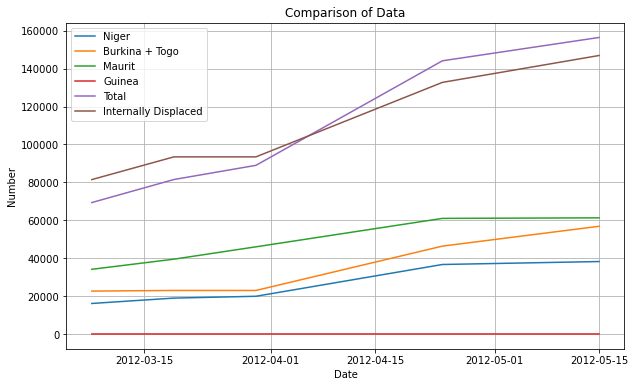

In [137]:
plt.figure(figsize=(10, 6))

plt.plot(date, nig, label='Niger')
plt.plot(date, bf, label='Burkina + Togo')
plt.plot(date, mau, label='Maurit')
plt.plot(date, gui, label='Guinea')
plt.plot(date, ref, label='Total')
plt.plot(date, idp, label='Internally Displaced')

plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Comparison of Data')
plt.legend()
plt.grid(True)

plt.show()

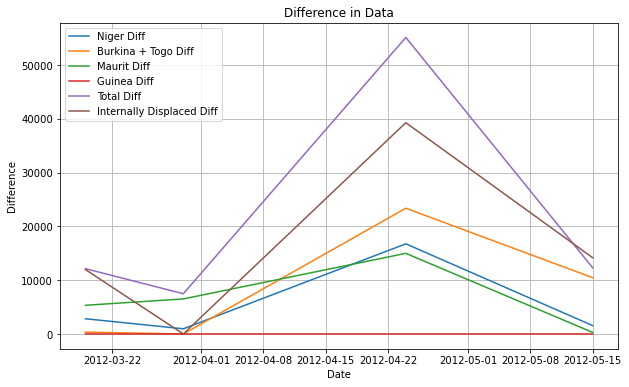

In [138]:
date = pd.to_datetime(df['date'], format='%d-%m-%Y')
nig_diff = np.diff(np.array(df['Niger']))
bf_diff = np.diff(np.array(df['Burkina'] + df['Togo']))
mau_diff = np.diff(np.array(df['Maurit']))
gui_diff = np.diff(np.array(df['Guinea']))
ref_diff = np.diff(np.array(df['Total']))
idp_diff = np.diff(np.array(df['Internally Displaced']))

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(date[1:], nig_diff, label='Niger Diff')
plt.plot(date[1:], bf_diff, label='Burkina + Togo Diff')
plt.plot(date[1:], mau_diff, label='Maurit Diff')
plt.plot(date[1:], gui_diff, label='Guinea Diff')
plt.plot(date[1:], ref_diff, label='Total Diff')
plt.plot(date[1:], idp_diff, label='Internally Displaced Diff')

plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Difference in Data')
plt.legend()
plt.grid(True)

plt.show()

In [139]:
date_range = pd.date_range(start='2012-01-01', end='2013-01-01')

def prepare_data(df, date_col, value_col, date_range):
    df[date_col] = pd.to_datetime(df[date_col], format='%Y-%m-%d')
    df.set_index(date_col, inplace=True)

    # Interpolating missing dates
    df = df.reindex(date_range).interpolate(method='time')

    # Extrapolating the first and last values if necessary
    df = df.fillna(method='ffill').fillna(method='bfill')

    return df

#nig

tabareybarey = pd.read_csv('pop_data/nig-tabareybarey.csv')
tabareybarey = prepare_data(tabareybarey, '#DateTime','Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)', date_range)

niamey = pd.read_csv('pop_data/nig-niamey.csv')
niamey = prepare_data(niamey, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

mangaize = pd.read_csv('pop_data/nig-mangaize.csv')
mangaize = prepare_data(mangaize, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

intikane = pd.read_csv('pop_data/nig-intikane.csv')
intikane = prepare_data(intikane, 'DateTime','Nombre estimé de réfugiés maliens par période', date_range)

abala = pd.read_csv('pop_data/nig-abala.csv')
abala = prepare_data(abala, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

#mau

mbera = pd.read_csv('pop_data/mau-mbera.csv')
mbera = prepare_data(mbera, 'DateTime','Réfugiés maliens', date_range)

fassala = pd.read_csv('pop_data/mau-fassala.csv')
fassala = prepare_data(fassala, 'DateTime','Réfugiés maliens', date_range)

#bf

ouagadougou = pd.read_csv('pop_data/bf-ouagadougou.csv')
ouagadougou = prepare_data(ouagadougou, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

mentao = pd.read_csv('pop_data/bf-mentao.csv')
mentao = prepare_data(mentao, '#DateTime','Nombre estimé de réfugiés maliens par période (border opens on 21st of March)', date_range)

goudoubo = pd.read_csv('pop_data/bf-goudoubo.csv')
goudoubo = prepare_data(goudoubo, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

bobo = pd.read_csv('pop_data/bf-bobo.csv')
bobo = prepare_data(bobo, '#DateTime','Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)', date_range)


camps = [bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'],
         goudoubo['Nombre estimé de réfugiés maliens par période'],
         mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'],
         ouagadougou['Nombre estimé de réfugiés maliens par période'],
         fassala['Réfugiés maliens'],
         mbera['Réfugiés maliens'],
         abala['Nombre estimé de réfugiés maliens par période'],
         mangaize['Nombre estimé de réfugiés maliens par période'],
         niamey['Nombre estimé de réfugiés maliens par période'],
         tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)']]

total_refugees_emp = np.zeros(len(camps[0]))
for i in range(len(camps[0])):
    for camp in camps:
        total_refugees_emp[i]+=camp[i]

print(total_refugees_emp)

[ 20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20075.          20075.          20075.          20075.
  20806.63797777  21538.27595554  22269.91393332  23001.55191109
  23733.18988886  24464.82786663  25196.4658444   25794.91334598
  26393.3608475

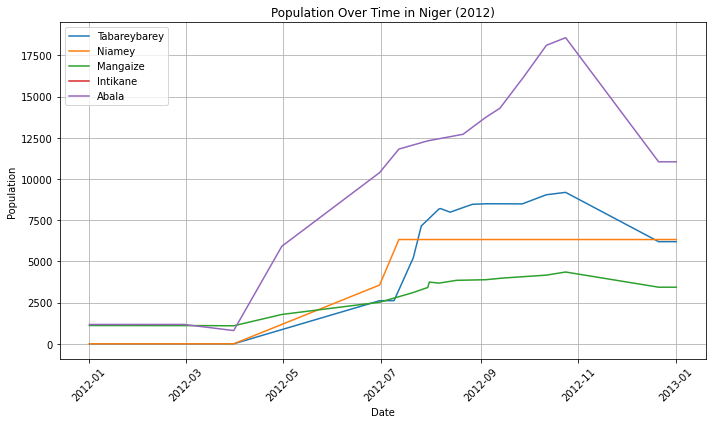

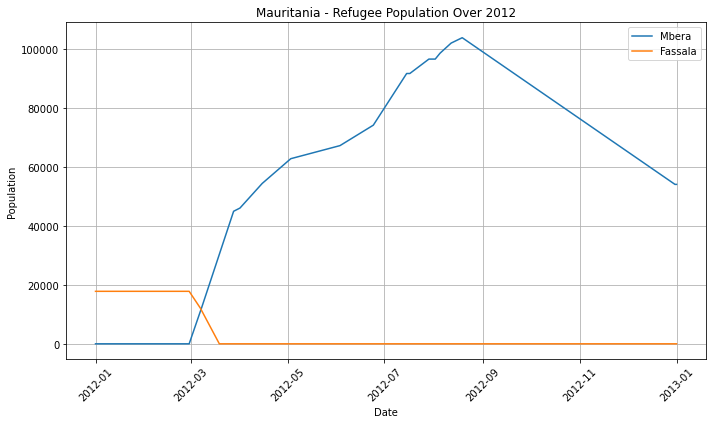

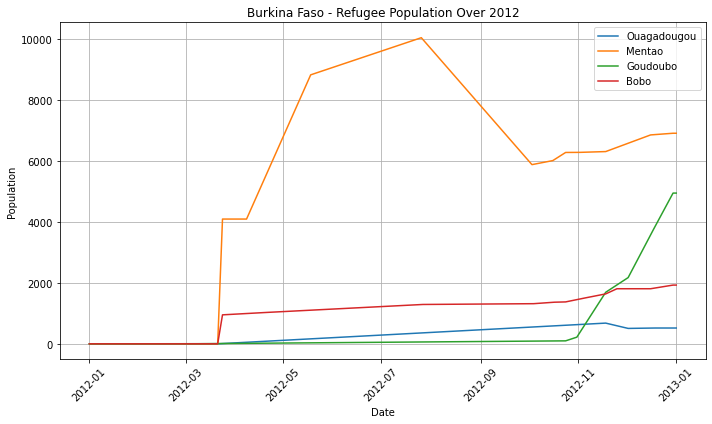

In [140]:
plt.figure(figsize=(10, 6))

# Plot for Niger
plt.plot(tabareybarey.index, tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'], label='Tabareybarey')
plt.plot(niamey.index, niamey['Nombre estimé de réfugiés maliens par période'], label='Niamey')
plt.plot(mangaize.index, mangaize['Nombre estimé de réfugiés maliens par période'], label='Mangaize')
plt.plot(intikane.index, intikane['Nombre estimé de réfugiés maliens par période'], label='Intikane')
plt.plot(abala.index, abala['Nombre estimé de réfugiés maliens par période'], label='Abala')

plt.title('Population Over Time in Niger (2012)')  
plt.xlabel('Date')  
plt.ylabel('Population') 
plt.grid(True)  
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()  
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mbera.index, mbera['Réfugiés maliens'], label='Mbera')
plt.plot(fassala.index, fassala['Réfugiés maliens'], label='Fassala')
plt.title('Mauritania - Refugee Population Over 2012')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ouagadougou.index, ouagadougou['Nombre estimé de réfugiés maliens par période'], label='Ouagadougou')
plt.plot(mentao.index, mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'], label='Mentao')
plt.plot(goudoubo.index, goudoubo['Nombre estimé de réfugiés maliens par période'], label='Goudoubo')
plt.plot(bobo.index, bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'], label='Bobo')

plt.title('Burkina Faso - Refugee Population Over 2012')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [141]:
sim = pd.read_csv("Camp_splits.csv")


date_sim=pd.to_datetime(sim['Date'], format='%Y-%m-%d')
bobo_sim=sim['Bobo']
goudoubo_sim=sim['Goudoubo']
mentao_sim=sim['Mentao']
ouagadougou_sim=sim['Ouagadougou']
fassala_sim=sim['Fassala']
mbera_sim=sim['Mbera']
abala_sim=sim['Abala']
mangaize_sim=sim['Mangaize']
niamey_sim=sim['Niamey']
tabareybarey_sim=sim['Tabareybarey']



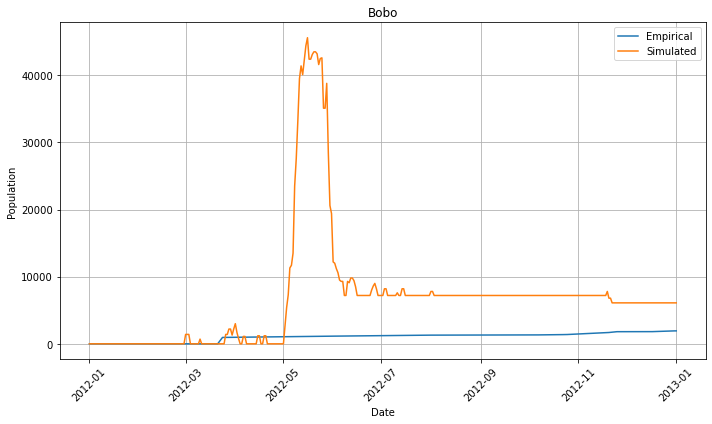

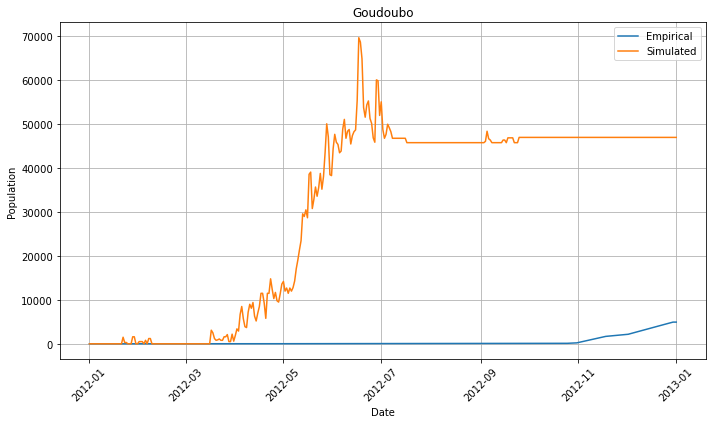

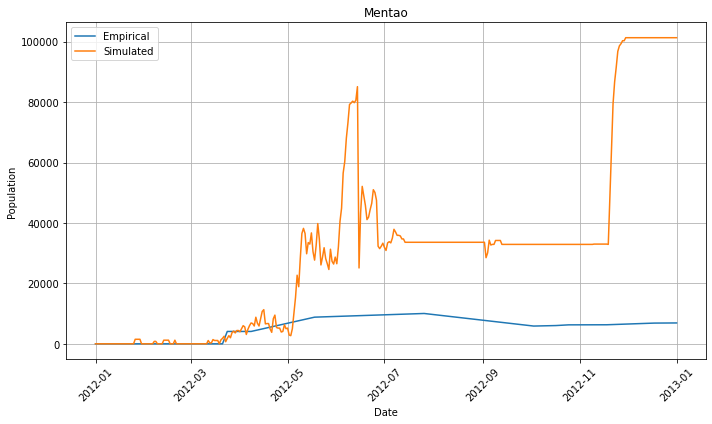

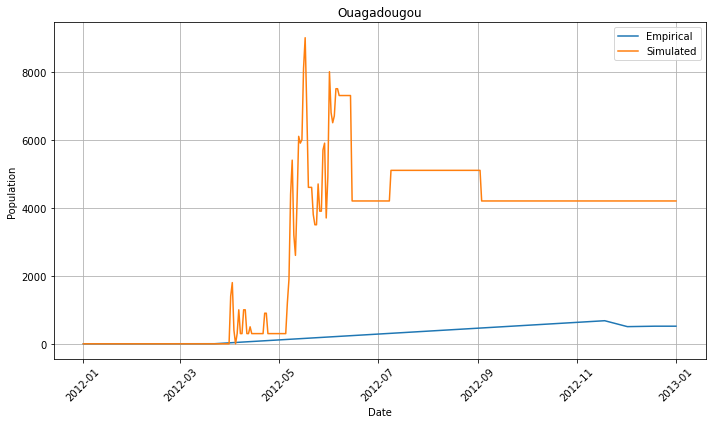

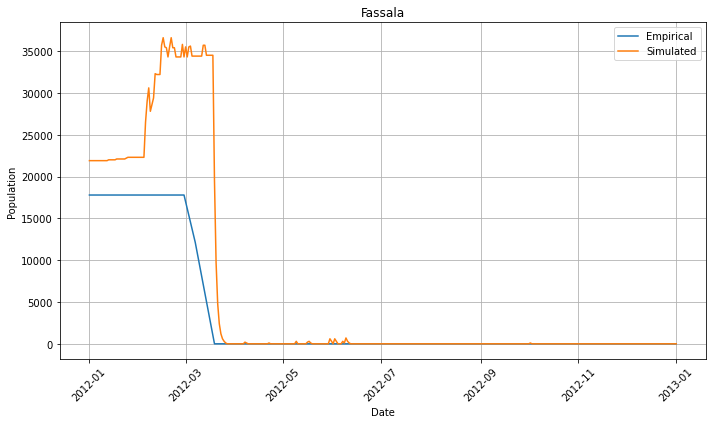

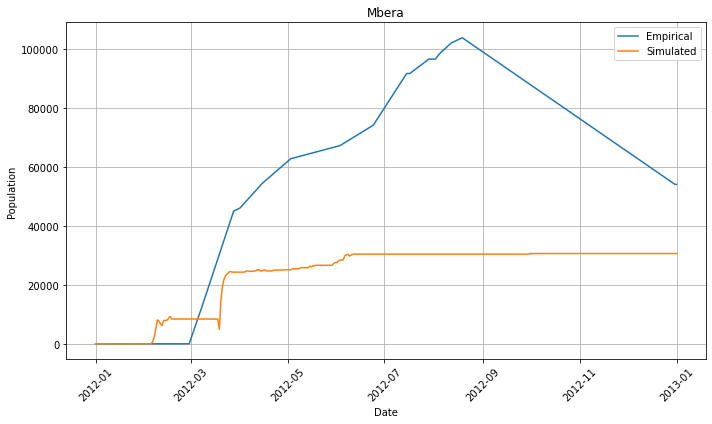

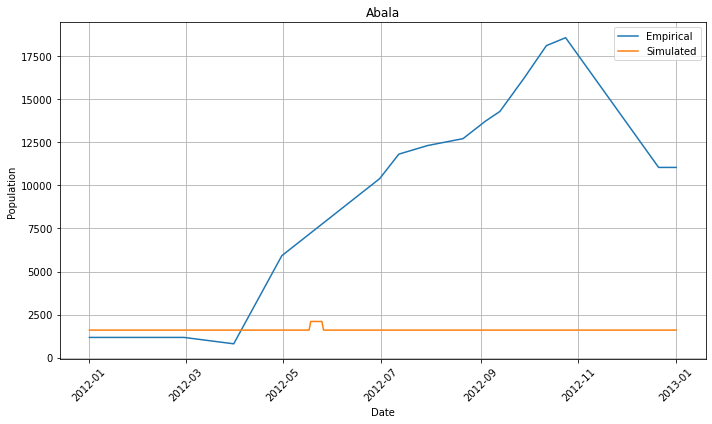

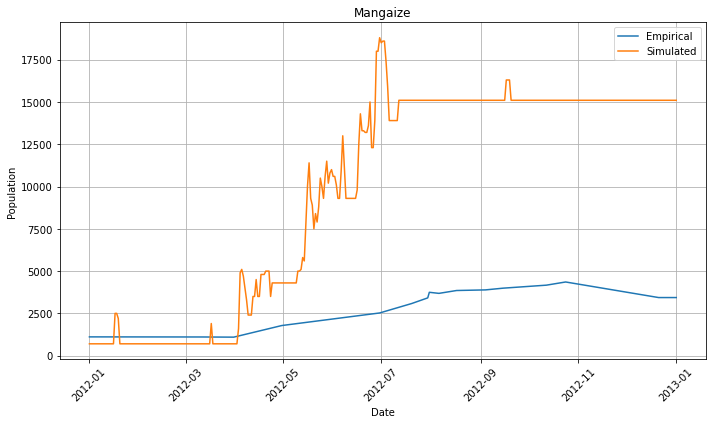

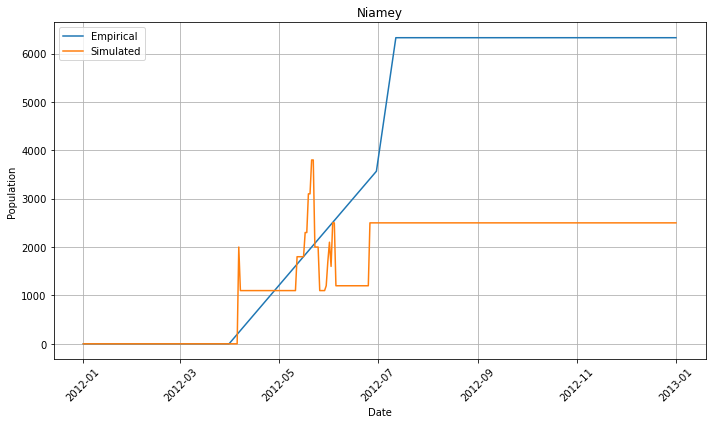

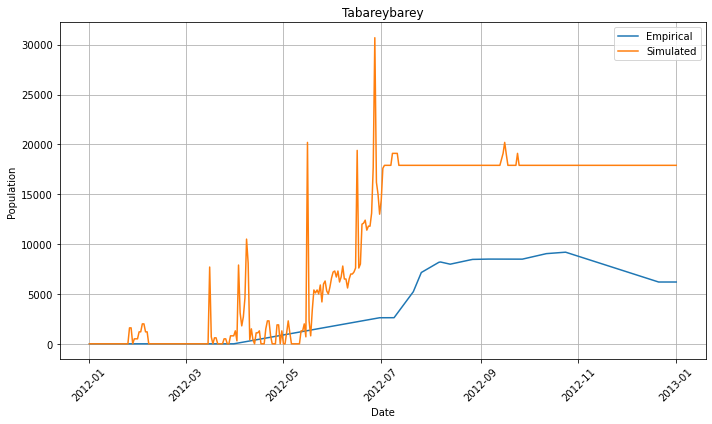

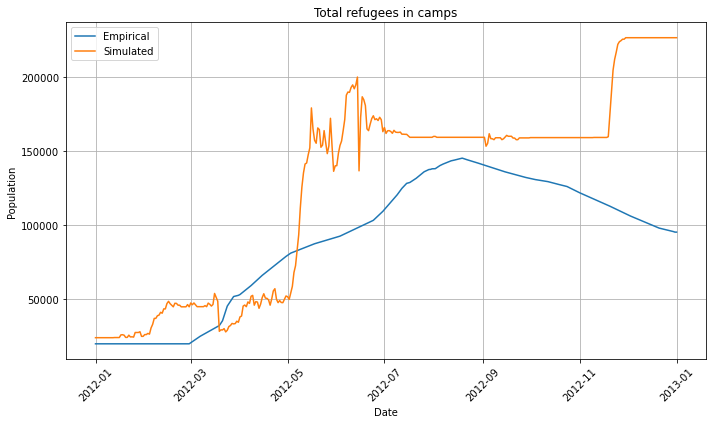

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Function to apply moving average smoothing
def moving_average(series, window_size):
    return series.rolling(window=window_size, min_periods=1).mean()

# Example window size
window_size = 5

# Example of Gaussian smoothing function
def gaussian_smoothing(series, sigma):
    return gaussian_filter1d(series, sigma=sigma)

# Example sigma for Gaussian smoothing
sigma = 2

# Smooth the empirical and simulated data for each dataset

# Bobo
bobo_smoothed = bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)']
bobo_sim_smoothed = moving_average(pd.Series(bobo_sim), window_size)

plt.figure(figsize=(10, 6))
plt.plot(bobo.index, bobo_smoothed, label='Empirical')
plt.plot(date_sim, bobo_sim, label='Simulated')
plt.title('Bobo')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Goudoubo
goudoubo_smoothed = goudoubo['Nombre estimé de réfugiés maliens par période']
goudoubo_sim_smoothed = moving_average(pd.Series(goudoubo_sim), window_size)

plt.figure(figsize=(10, 6))
plt.plot(goudoubo.index, goudoubo_smoothed, label='Empirical')
plt.plot(date_sim, goudoubo_sim, label='Simulated')
plt.title('Goudoubo')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mentao
mentao_smoothed = mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)']
mentao_sim_smoothed = moving_average(pd.Series(mentao_sim), window_size)

plt.figure(figsize=(10, 6))
plt.plot(mentao.index, mentao_smoothed, label='Empirical')
plt.plot(date_sim, mentao_sim, label='Simulated')
plt.title('Mentao')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ouagadougou
ouagadougou_smoothed = ouagadougou['Nombre estimé de réfugiés maliens par période']
ouagadougou_sim_smoothed = moving_average(pd.Series(ouagadougou_sim), window_size)

plt.figure(figsize=(10, 6))
plt.plot(ouagadougou.index, ouagadougou_smoothed, label='Empirical')
plt.plot(date_sim, ouagadougou_sim, label='Simulated')
plt.title('Ouagadougou')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fassala
fassala_smoothed = fassala['Réfugiés maliens']
fassala_sim_smoothed = moving_average(pd.Series(fassala_sim), window_size)

plt.figure(figsize=(10, 6))
plt.plot(fassala.index, fassala_smoothed, label='Empirical')
plt.plot(date_sim, fassala_sim, label='Simulated')
plt.title('Fassala')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mbera
mbera_smoothed = mbera['Réfugiés maliens']
mbera_sim_smoothed = moving_average(pd.Series(mbera_sim), window_size)

plt.figure(figsize=(10, 6))
plt.plot(mbera.index, mbera_smoothed, label='Empirical')
plt.plot(date_sim, mbera_sim, label='Simulated')
plt.title('Mbera')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Abala
abala_smoothed = abala['Nombre estimé de réfugiés maliens par période']
abala_sim_smoothed = moving_average(pd.Series(abala_sim), window_size)

plt.figure(figsize=(10, 6))
plt.plot(abala.index, abala_smoothed, label='Empirical')
plt.plot(date_sim, abala_sim, label='Simulated')
plt.title('Abala')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Mangaize
mangaize_smoothed = mangaize['Nombre estimé de réfugiés maliens par période']
mangaize_sim_smoothed = moving_average(pd.Series(mangaize_sim), window_size)

plt.figure(figsize=(10, 6))
plt.plot(mangaize.index, mangaize_smoothed, label='Empirical')
plt.plot(date_sim, mangaize_sim, label='Simulated')
plt.title('Mangaize')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Niamey
niamey_smoothed = niamey['Nombre estimé de réfugiés maliens par période']
niamey_sim_smoothed = moving_average(pd.Series(niamey_sim), window_size)

plt.figure(figsize=(10, 6))
plt.plot(niamey.index, niamey_smoothed, label='Empirical')
plt.plot(date_sim, niamey_sim, label='Simulated')
plt.title('Niamey')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tabareybarey
tabareybarey_smoothed = tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)']
tabareybarey_sim_smoothed = moving_average(pd.Series(tabareybarey_sim), window_size)

plt.figure(figsize=(10, 6))
plt.plot(tabareybarey.index, tabareybarey_smoothed, label='Empirical')
plt.plot(date_sim, tabareybarey_sim, label='Simulated')
plt.title('Tabareybarey')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

camps = [bobo_sim,goudoubo_sim,mentao_sim,ouagadougou_sim,fassala_sim,mbera_sim,abala_sim,mangaize_sim,niamey_sim,tabareybarey_sim]

total_refugees_sim=[0]*len(camps[0])

# Sum the refugee counts for each date across all camps
for i in range(len(camps[0])):
    for camp in camps:
        total_refugees_sim[i]+=camp[i]

plt.figure(figsize=(10, 6))
plt.plot(tabareybarey.index, total_refugees_emp, label='Empirical')
plt.plot(date_sim, total_refugees_sim, label='Simulated')
plt.title('Total refugees in camps')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()   

bobo_upscaled=[]
goudoubo_upscaled=[]
mentao_upscaled=[]
ouagadougou_upscaled=[]
fassala_upscaled=[]
mbera_upscaled=[]
abala_upscaled=[]
mangaize_upscaled=[]
niamey_upscaled=[]
tabareybarey_upscaled=[]



for i in range(len(total_refugees_emp)):
    
    upscale=total_refugees_emp[i]/total_refugees_sim[i]
    bobo_upscaled.append(
        bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][i]*
        upscale)
    goudoubo_upscaled.append(goudoubo['Nombre estimé de réfugiés maliens par période'][i]*
        upscale)
    mentao_upscaled.append(mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'][i]*
        upscale)
    ouagadougou_upscaled.append(ouagadougou['Nombre estimé de réfugiés maliens par période'][i]*
        upscale)
    fassala_upscaled.append(fassala['Réfugiés maliens'][i]*
        upscale)
    mbera_upscaled.append(mbera['Réfugiés maliens'][i]*
        upscale)
    abala_upscaled.append(abala['Nombre estimé de réfugiés maliens par période'][i]*
        upscale)
    mangaize_upscaled.append(mangaize['Nombre estimé de réfugiés maliens par période'][i]*
        upscale)
    niamey_upscaled.append(niamey['Nombre estimé de réfugiés maliens par période'][i]*
        upscale)
    tabareybarey_upscaled.append(tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][i]*upscale)
    


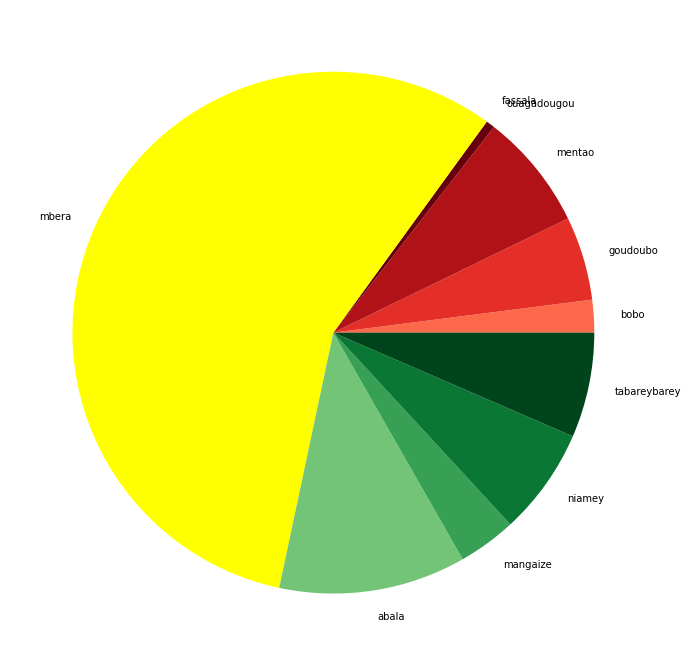

In [143]:
names = ['bobo', 'goudoubo', 'mentao', 'ouagadougou', 'fassala', 'mbera', 'abala', 'mangaize', 'niamey', 'tabareybarey']

values = [
    bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][-1],
    goudoubo['Nombre estimé de réfugiés maliens par période'][-1],
    mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'][-1],
    ouagadougou['Nombre estimé de réfugiés maliens par période'][-1],
    fassala['Réfugiés maliens'][-1],
    mbera['Réfugiés maliens'][-1],
    abala['Nombre estimé de réfugiés maliens par période'][-1],
    mangaize['Nombre estimé de réfugiés maliens par période'][-1],
    niamey['Nombre estimé de réfugiés maliens par période'][-1],
    tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][-1]
]

shades_red = plt.cm.Reds(np.linspace(0.5, 1, 4))
yellow_colors = [(1, 1, 0, i) for i in np.linspace(0.5, 1, 2)]
cmap_yellow = mcolors.LinearSegmentedColormap.from_list("yellow_shades", yellow_colors)
shades_yellow = cmap_yellow(np.linspace(0, 1, 2))
shades_green = plt.cm.Greens(np.linspace(0.5, 1, 4))

colors = [*shades_red, *shades_yellow, *shades_green]


plt.figure(figsize=(20, 12))
plt.pie(values, labels=names, colors=colors)
plt.show()

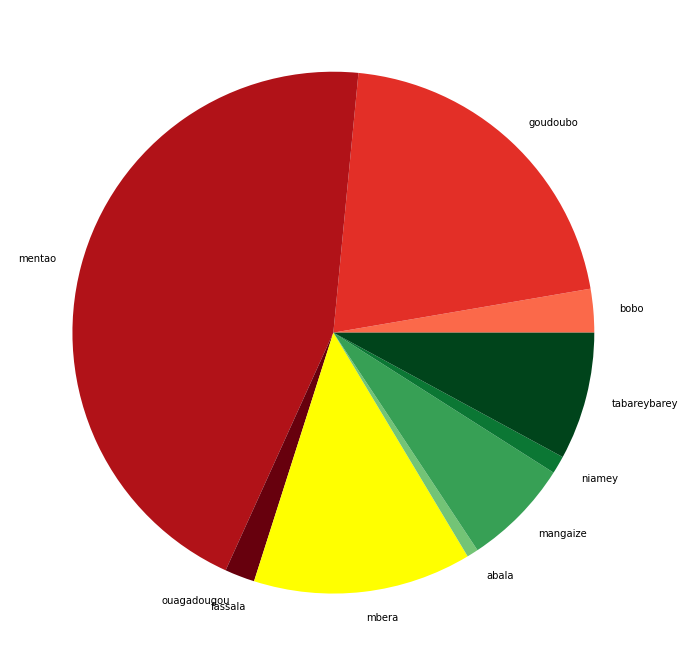

In [144]:
names = ['bobo', 'goudoubo', 'mentao', 'ouagadougou', 'fassala', 'mbera', 'abala', 'mangaize', 'niamey', 'tabareybarey']

values = [
    abs(bobo_sim.iloc[-1]),
    abs(goudoubo_sim.iloc[-1]),
    abs(mentao_sim.iloc[-1]),
    abs(ouagadougou_sim.iloc[-1]),
    abs(fassala_sim.iloc[-1]),
    abs(mbera_sim.iloc[-1]),
    abs(abala_sim.iloc[-1]),
    abs(mangaize_sim.iloc[-1]),
    abs(niamey_sim.iloc[-1]),
    abs(tabareybarey_sim.iloc[-1])
]



shades_red = plt.cm.Reds(np.linspace(0.5, 1, 4))
yellow_colors = [(1, 1, 0, i) for i in np.linspace(0.5, 1, 2)]
cmap_yellow = mcolors.LinearSegmentedColormap.from_list("yellow_shades", yellow_colors)
shades_yellow = cmap_yellow(np.linspace(0, 1, 2))
shades_green = plt.cm.Greens(np.linspace(0.5, 1, 4))

colors = [*shades_red, *shades_yellow, *shades_green]


plt.figure(figsize=(20, 12))
plt.pie(values, labels=names, colors=colors)
plt.show()

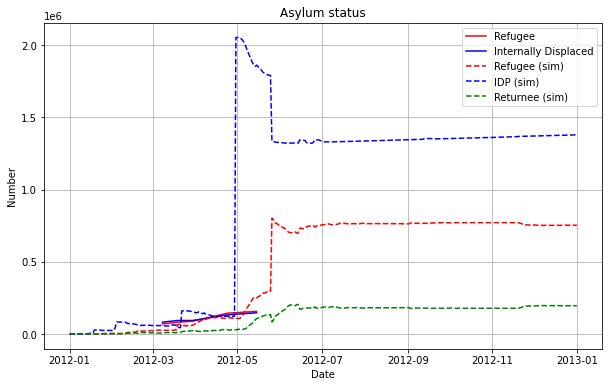

In [145]:

stat_sim = pd.read_csv("Status_splits.csv")

date_stat_sim = pd.to_datetime(stat_sim['Date'])
ref_sim = stat_sim['Refugee']
ret_sim = stat_sim['Returnee']
idp_sim = stat_sim['IDP']

plt.figure(figsize=(10, 6))


plt.plot(date, ref, label='Refugee', color='Red')
plt.plot(date, idp, label='Internally Displaced',color='Blue')

plt.plot(date_stat_sim,ref_sim,color='Red',linestyle='--',label='Refugee (sim)')
plt.plot(date_stat_sim,idp_sim,color='Blue',linestyle='--',label='IDP (sim)')
plt.plot(date_stat_sim,ret_sim,color='Green',linestyle='--',label='Returnee (sim)')



plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Asylum status')
plt.legend()
plt.grid(True)

plt.show()








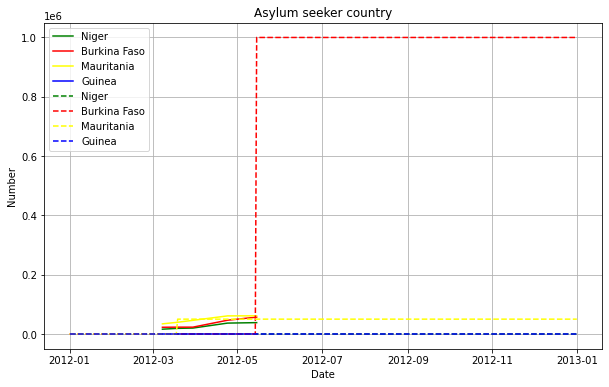

In [146]:
count_sim = pd.read_csv("Country_split_refugees_w0_roulette.csv")

date_count_sim = pd.to_datetime(count_sim['Date'])
nig_sim = count_sim['Niger']
bf_sim = count_sim['Burkina Faso']
mau_sim = count_sim['Mauritania']
gui_sim =count_sim['Guinea']


plt.figure(figsize=(10, 6))


plt.plot(date, nig, label='Niger', color='Green')
plt.plot(date, bf, label='Burkina Faso',color='Red')
plt.plot(date, mau, label='Mauritania',color='Yellow')
plt.plot(date, gui, label='Guinea',color='Blue')

plt.plot(date_count_sim, nig_sim, label='Niger', color='Green',linestyle='--')
plt.plot(date_count_sim, bf_sim, label='Burkina Faso',color='Red',linestyle='--')
plt.plot(date_count_sim, mau_sim, label='Mauritania',color='Yellow',linestyle='--')
plt.plot(date_count_sim, gui_sim, label='Guinea',color='Blue',linestyle='--')





plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Asylum seeker country')
plt.legend()
plt.grid(True)

plt.show()

In [147]:
flee = pd.read_csv("Fleeresults.csv")

flee.columns

Index(['Day', 'Mbera sim', 'Mbera data', 'Mbera error', 'Mentao sim',
       'Mentao data', 'Mentao error', 'Bobo-Dioulasso sim',
       'Bobo-Dioulasso data', 'Bobo-Dioulasso error', 'Abala sim',
       'Abala data', 'Abala error', 'Mangaize sim', 'Mangaize data',
       'Mangaize error', 'Niamey sim', 'Niamey data', 'Niamey error',
       'Tabareybarey sim', 'Tabareybarey data', 'Tabareybarey error',
       'Total error', 'refugees in camps (UNHCR)',
       'total refugees (simulation)', 'raw UNHCR refugee count',
       'retrofitted time', 'refugees in camps (simulation)', 'refugee_debt',
       'Total error (retrofitted)'],
      dtype='object')

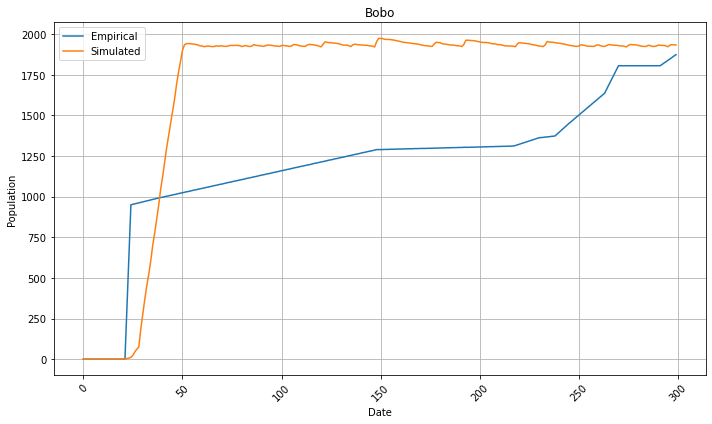

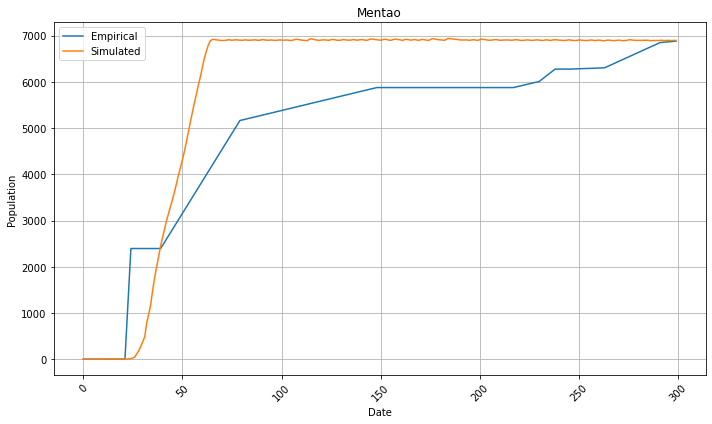

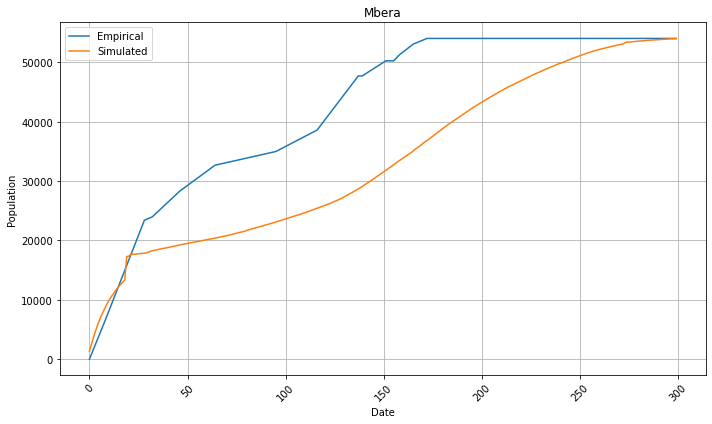

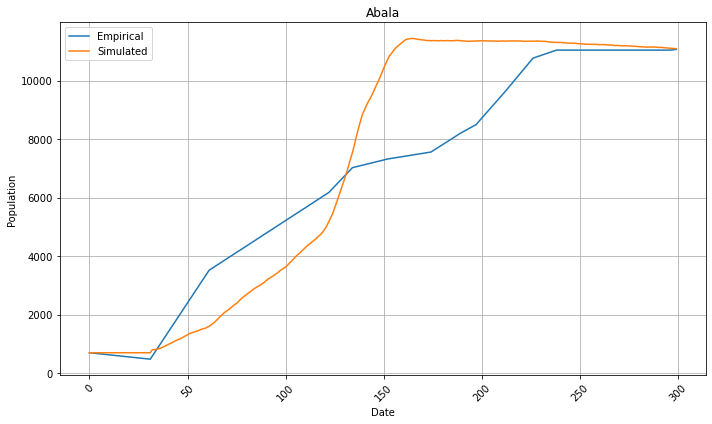

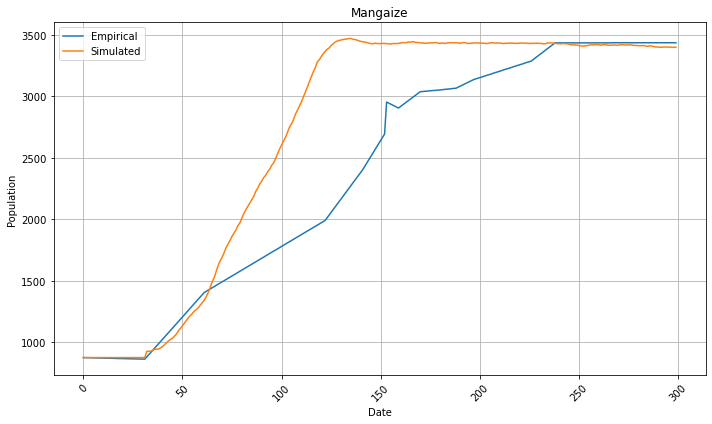

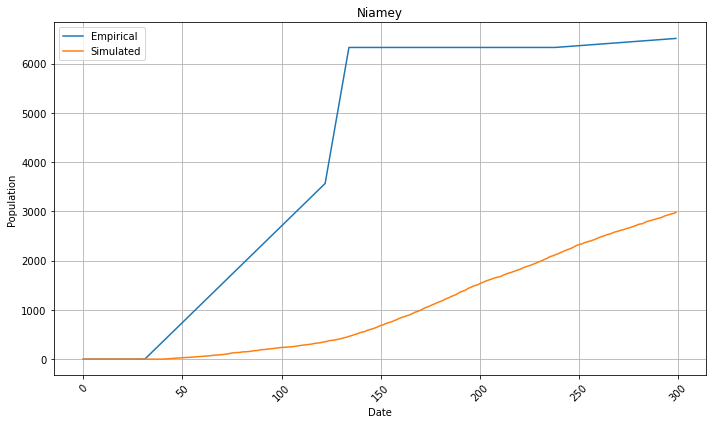

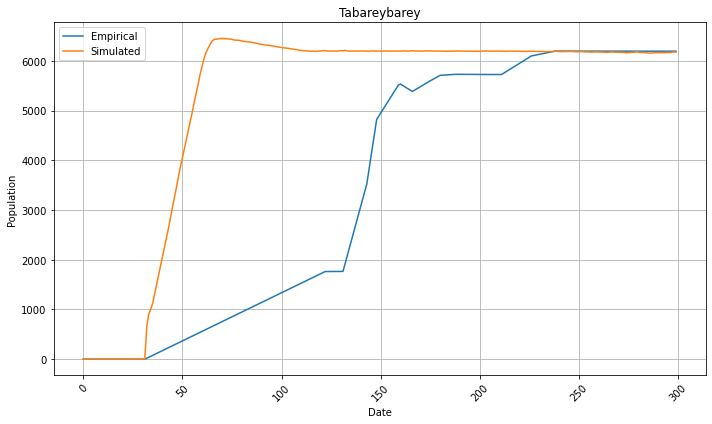

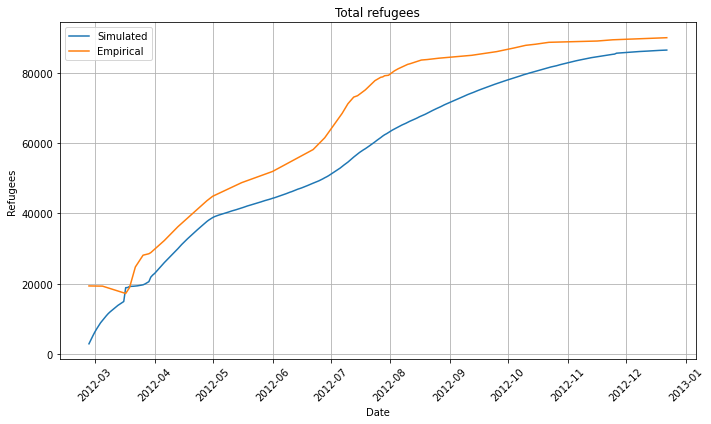

In [148]:
flee['Date'] = pd.to_datetime('2012-01-01') + pd.to_timedelta(flee['Day'], unit='D') + pd.Timedelta(days=57)

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Bobo-Dioulasso data'], label='Empirical')
plt.plot(flee['Day'],flee['Bobo-Dioulasso sim'], label='Simulated')
plt.title('Bobo')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Mentao data'], label='Empirical')
plt.plot(flee['Day'],flee['Mentao sim'], label='Simulated')
plt.title('Mentao')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Mbera data'], label='Empirical')
plt.plot(flee['Day'],flee['Mbera sim'], label='Simulated')
plt.title('Mbera')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Abala data'], label='Empirical')
plt.plot(flee['Day'],flee['Abala sim'], label='Simulated')
plt.title('Abala')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Mangaize data'], label='Empirical')
plt.plot(flee['Day'],flee['Mangaize sim'], label='Simulated')
plt.title('Mangaize')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Niamey data'], label='Empirical')
plt.plot(flee['Day'],flee['Niamey sim'], label='Simulated')
plt.title('Niamey')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Tabareybarey data'], label='Empirical')
plt.plot(flee['Day'],flee['Tabareybarey sim'], label='Simulated')
plt.title('Tabareybarey')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Date'],flee['refugees in camps (simulation)'],label ='Simulated' )
plt.plot(flee['Date'],flee['raw UNHCR refugee count'], label='Empirical')
plt.title('Total refugees')
plt.xlabel('Date')
plt.ylabel('Refugees')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



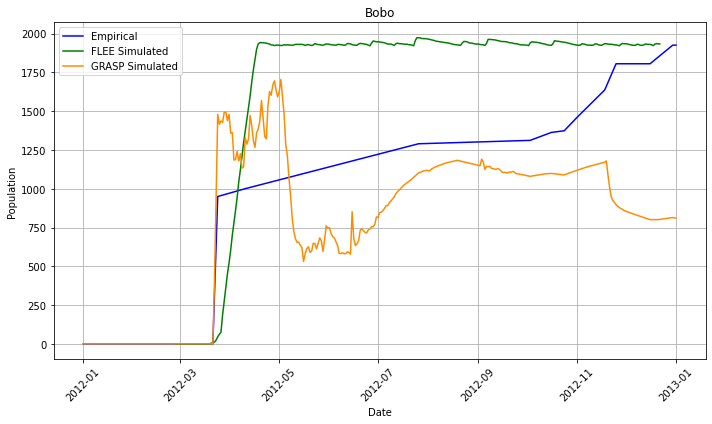

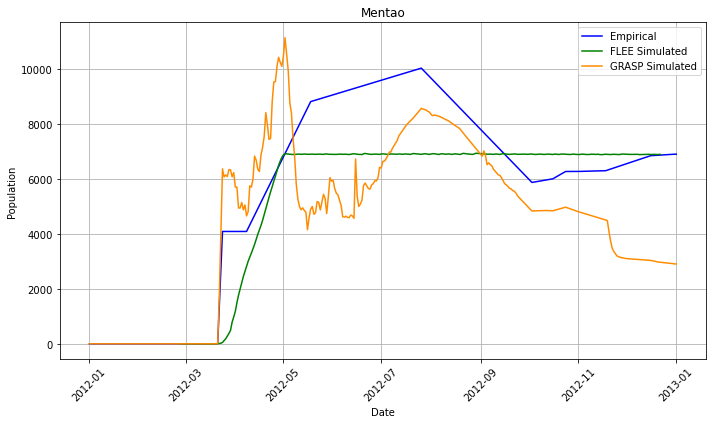

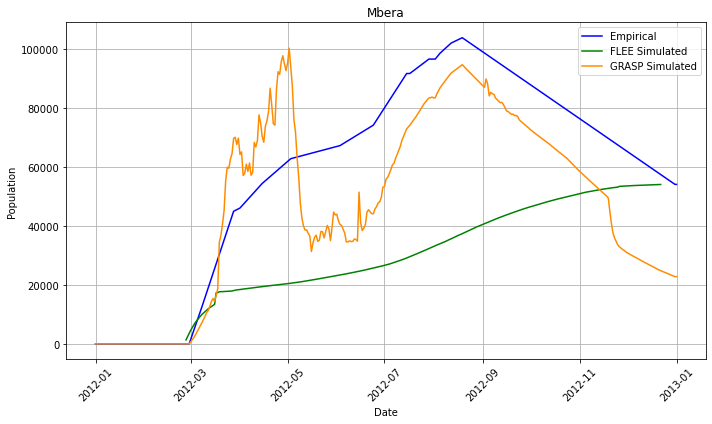

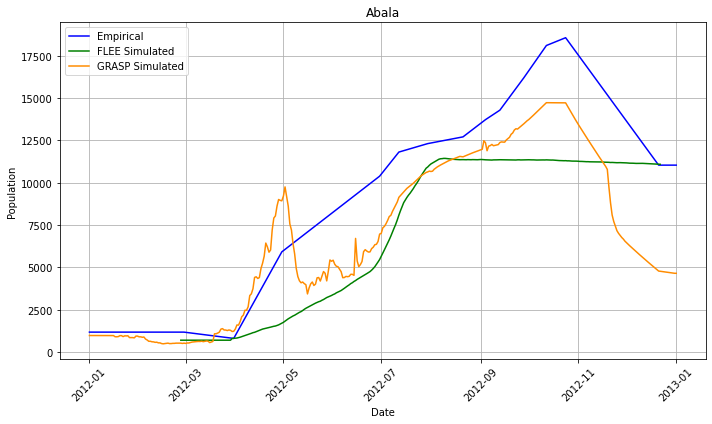

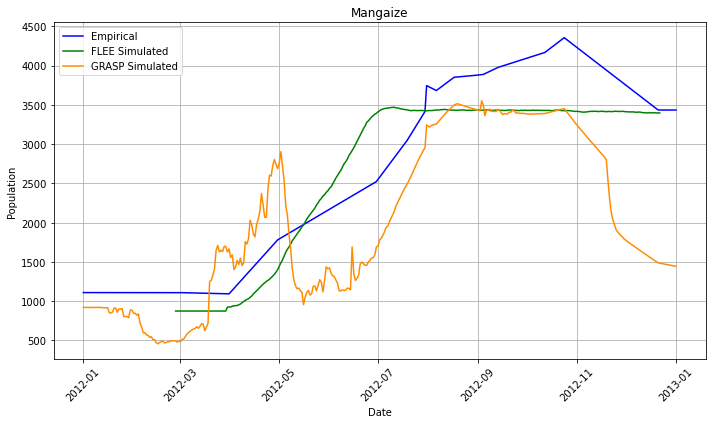

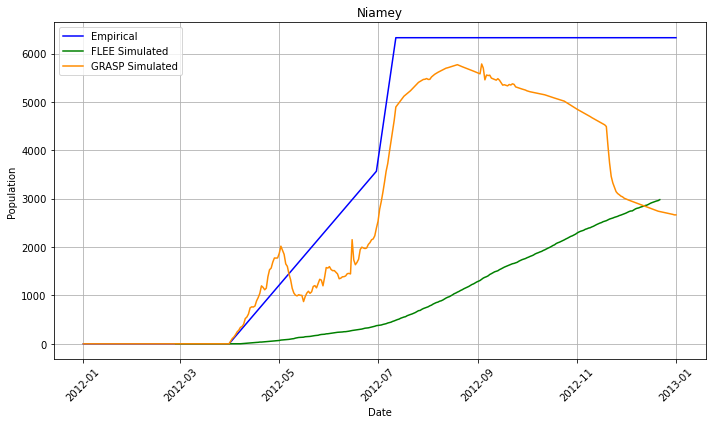

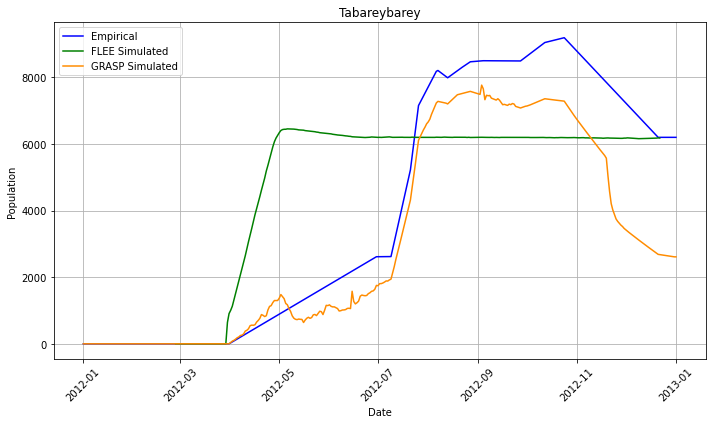

In [149]:
plt.figure(figsize=(10, 6))
plt.plot(bobo.index, bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'], label='Empirical',color='b')
plt.plot(flee['Date'],flee['Bobo-Dioulasso sim'], label='FLEE Simulated',color='g')
plt.plot(date_sim,bobo_upscaled, label='GRASP Simulated',color='darkorange')
plt.title('Bobo')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mentao.index, mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'], label='Empirical',color='b')
plt.plot(flee['Date'],flee['Mentao sim'], label='FLEE Simulated',color='g')
plt.plot(date_sim,mentao_upscaled, label='GRASP Simulated',color='darkorange')
plt.title('Mentao')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mbera.index, mbera['Réfugiés maliens'], label='Empirical',color='b')
plt.plot(flee['Date'],flee['Mbera sim'], label='FLEE Simulated',color='g')
plt.plot(date_sim,mbera_upscaled, label='GRASP Simulated',color='darkorange')
plt.title('Mbera')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(abala.index, abala['Nombre estimé de réfugiés maliens par période'], label='Empirical',color='b')
plt.plot(flee['Date'],flee['Abala sim'], label='FLEE Simulated',color='g')
plt.plot(date_sim,abala_upscaled, label='GRASP Simulated',color='darkorange')
plt.title('Abala')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mangaize.index, mangaize['Nombre estimé de réfugiés maliens par période'], label='Empirical',color='b')
plt.plot(flee['Date'],flee['Mangaize sim'], label='FLEE Simulated',color='g')
plt.plot(date_sim,mangaize_upscaled, label='GRASP Simulated',color='darkorange')
plt.title('Mangaize')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(niamey.index, niamey['Nombre estimé de réfugiés maliens par période'], label='Empirical',color='b')
plt.plot(flee['Date'],flee['Niamey sim'], label='FLEE Simulated',color='g')
plt.plot(date_sim,niamey_upscaled, label='GRASP Simulated',color='darkorange')
plt.title('Niamey')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(tabareybarey.index, tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'], label='Empirical',color='b')
plt.plot(flee['Date'],flee['Tabareybarey sim'], label='FLEE Simulated',color='g')
plt.plot(date_sim,tabareybarey_upscaled, label='GRASP Simulated',color='darkorange')
plt.title('Tabareybarey')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

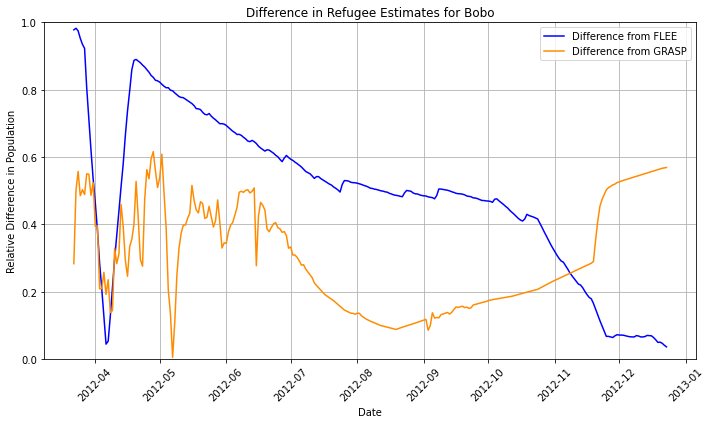

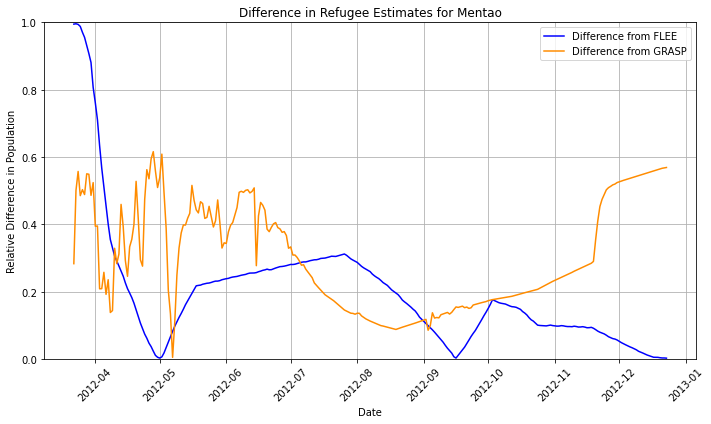

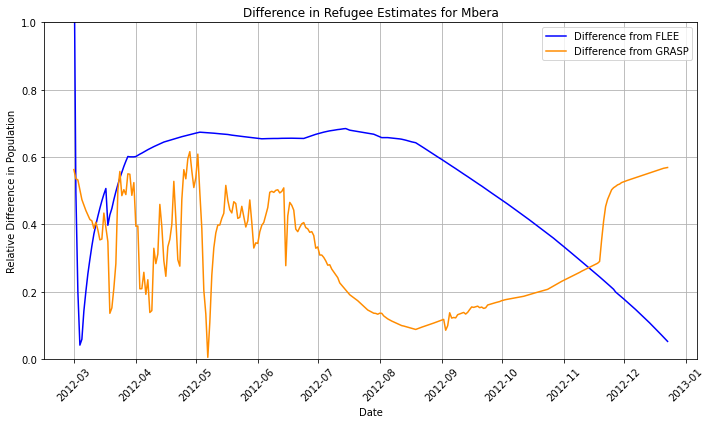

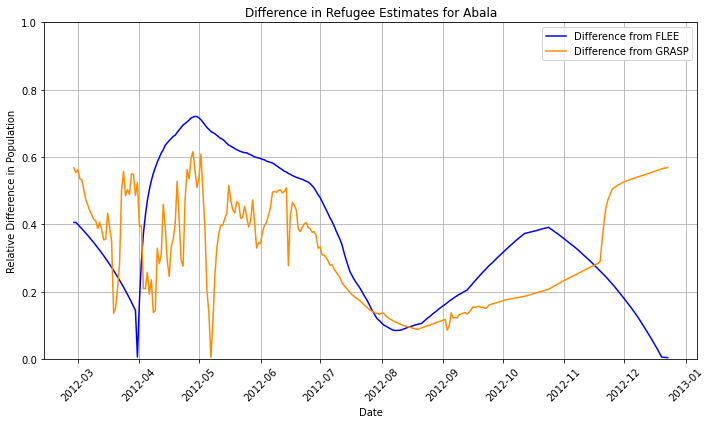

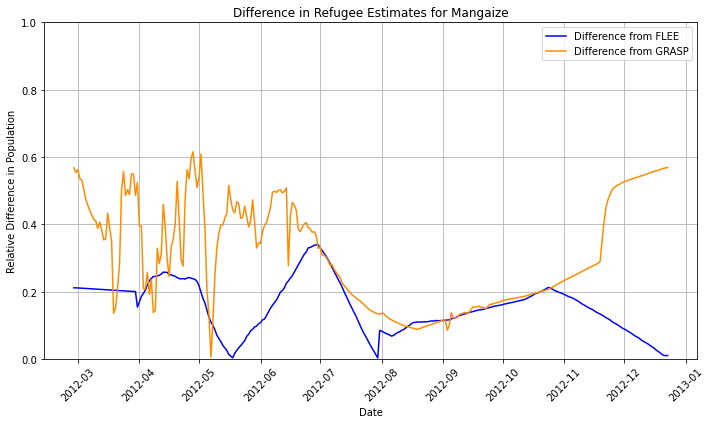

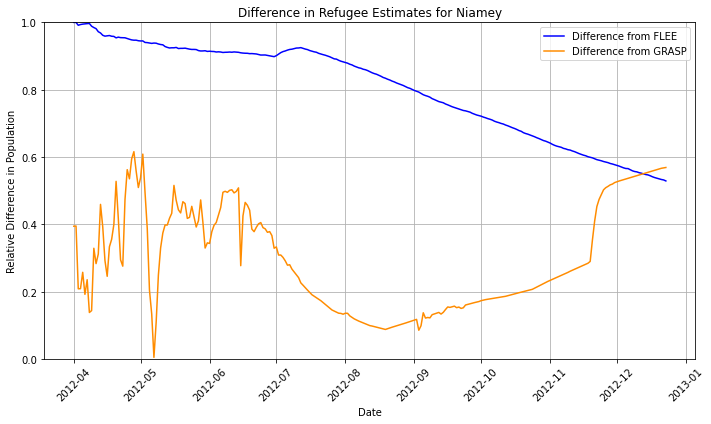

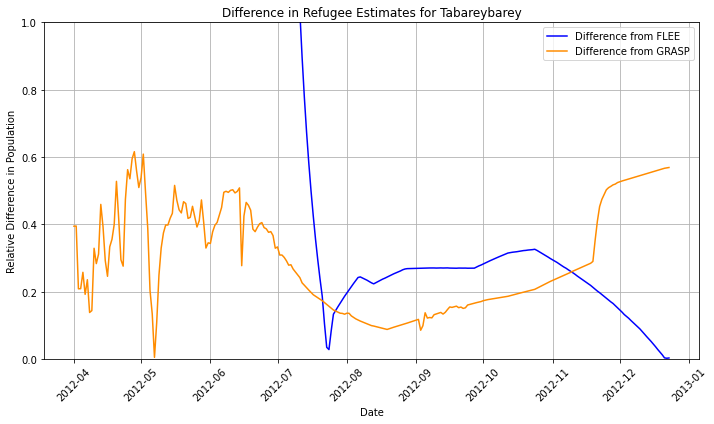

In [150]:

plt.figure(figsize=(10, 6))
difference_flee_bobo = abs((bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][58:358] - flee['Bobo-Dioulasso sim'].values)/bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][58:358])
difference_grasp_bobo = abs((bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'] - np.array(bobo_upscaled))/bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'])

plt.plot(bobo.index[58:358], difference_flee_bobo, label='Difference from FLEE',color='b')
plt.plot(bobo.index[58:358], difference_grasp_bobo[58:358], label='Difference from GRASP',color='darkorange')
plt.title('Difference in Refugee Estimates for Bobo')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
difference_flee_mentao = abs((mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'][58:358] - flee['Mentao sim'].values)/mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'][58:358])
difference_grasp_mentao = abs((mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'] -np.array(mentao_upscaled))/mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'])

plt.plot(mentao.index[58:358], difference_flee_mentao, label='Difference from FLEE',color='b')
plt.plot(mentao.index[58:358], difference_grasp_mentao[58:358], label='Difference from GRASP',color='darkorange')
plt.title('Difference in Refugee Estimates for Mentao')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
difference_flee_mbera= abs((mbera['Réfugiés maliens'][58:358] - flee['Mbera sim'].values)/mbera['Réfugiés maliens'][58:358])
difference_grasp_mbera = abs((mbera['Réfugiés maliens'] - np.array(mbera_upscaled))/mbera['Réfugiés maliens'])

plt.plot(mbera.index[58:358], difference_flee_mbera, label='Difference from FLEE',color='b')
plt.plot(mbera.index[58:358], difference_grasp_mbera[58:358], label='Difference from GRASP',color='darkorange')
plt.title('Difference in Refugee Estimates for Mbera')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
difference_flee_abala = abs((abala['Nombre estimé de réfugiés maliens par période'][58:358] - flee['Abala sim'].values)/abala['Nombre estimé de réfugiés maliens par période'][58:358])
difference_grasp_abala = abs((abala['Nombre estimé de réfugiés maliens par période'] - np.array(abala_upscaled))/abala['Nombre estimé de réfugiés maliens par période'])

plt.plot(abala.index[58:358], difference_flee_abala, label='Difference from FLEE',color='b')
plt.plot(abala.index[58:358], difference_grasp_abala[58:358], label='Difference from GRASP',color='darkorange')
plt.title('Difference in Refugee Estimates for Abala')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
difference_flee_mangaize = abs((mangaize['Nombre estimé de réfugiés maliens par période'][58:358] - flee['Mangaize sim'].values)/mangaize['Nombre estimé de réfugiés maliens par période'][58:358])
difference_grasp_mangaize = abs((mangaize['Nombre estimé de réfugiés maliens par période'] - np.array(mangaize_upscaled))/mangaize['Nombre estimé de réfugiés maliens par période'])

plt.plot(mangaize.index[58:358], difference_flee_mangaize, label='Difference from FLEE',color='b')
plt.plot(mangaize.index[58:358], difference_grasp_mangaize[58:358], label='Difference from GRASP',color='darkorange')
plt.title('Difference in Refugee Estimates for Mangaize')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
difference_flee_niamey = abs((niamey['Nombre estimé de réfugiés maliens par période'][58:358] - flee['Niamey sim'].values)/niamey['Nombre estimé de réfugiés maliens par période'][58:358])
difference_grasp_niamey = abs((niamey['Nombre estimé de réfugiés maliens par période'] - np.array(niamey_upscaled))/niamey['Nombre estimé de réfugiés maliens par période'])

plt.plot(niamey.index[58:358], difference_flee_niamey, label='Difference from FLEE',color='b')
plt.plot(niamey.index[58:358], difference_grasp_niamey[58:358], label='Difference from GRASP',color='darkorange')
plt.title('Difference in Refugee Estimates for Niamey')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
difference_flee_tabareybarey= abs((tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][58:358] - flee['Tabareybarey sim'].values)/tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][58:358])
difference_grasp_tabareybarey = abs((tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'] - np.array(tabareybarey_upscaled))/tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'])

plt.plot(tabareybarey.index[58:358], difference_flee_tabareybarey, label='Difference from FLEE',color='b')
plt.plot(tabareybarey.index[58:358], difference_grasp_tabareybarey[58:358], label='Difference from GRASP',color='darkorange')
plt.title('Difference in Refugee Estimates for Tabareybarey')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()


In [151]:
print(np.mean([x for x in difference_grasp_mbera if not np.isnan(x) and x != np.inf]))





0.31606964689474404


288
empnorms: [[0.0, 0.0, 0.008142767400738075, 0.015014337231731996, 0.020890833186244705, 0.020237952445220298, 0.01962837599826121, 0.019057933710928406, 0.018522974232493914, 0.01848579913272677, 0.01844900199716516, 0.018412577090744803, 0.01828208626284962, 0.018046169565217995, 0.017817653718583588, 0.01759619584722803, 0.01738147393354301, 0.017173185255717177, 0.016971044963774846, 0.0167747847798806, 0.01654684625795492, 0.016326203439422312, 0.016112511567677505, 0.015905447271115043, 0.015704706930329805, 0.01551000519266944, 0.015321073618854607, 0.015166802209334215, 0.015016401512361584, 0.014869727656937734, 0.014726643814884085, 0.014587019775099666, 0.014450731548333035, 0.01431766099994757, 0.014187695508393714, 0.014060727647313122, 0.013936654889388597, 0.01381537933022404, 0.01369680743069142, 0.013580849776319813, 0.013467420852425638, 0.01335643883379575, 0.013265757033198029, 0.013176752045409842, 0.013089377787146032, 0.013055090631463463, 0.01302115503958743,

/var/folders/s9/s5q4rpnj00j_kr4yj0f8c_dm0000gp/T/ipykernel_51025/528131781.py:74: RuntimeWarning: invalid value encountered in true_divide
  acc_dic[camp]['Precision'] = np.where(denominator != 0, tps / denominator, 1)


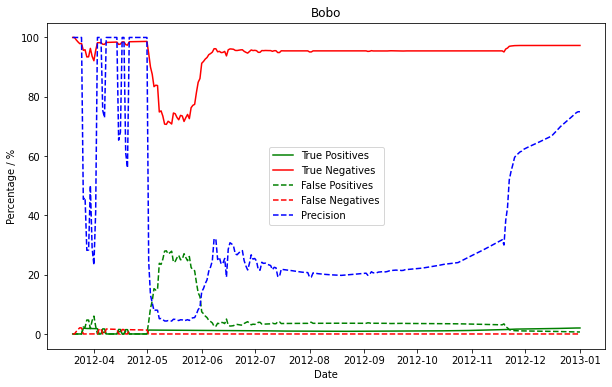

2.6201320776039476
Mean precision is 2.6201320776039476


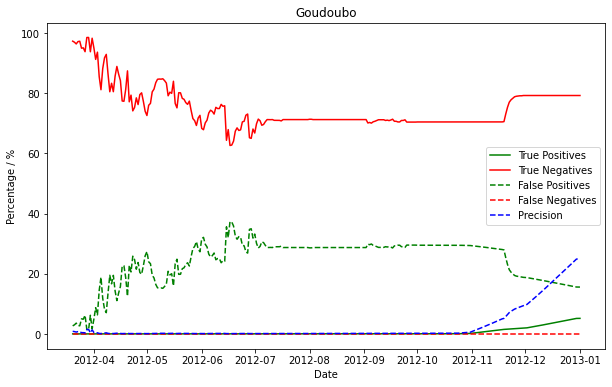

34.88806806878084
Mean precision is 34.88806806878084


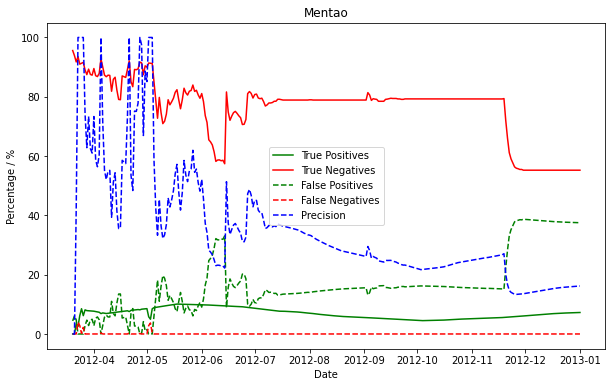

18.613001482254894
Mean precision is 18.613001482254894


/var/folders/s9/s5q4rpnj00j_kr4yj0f8c_dm0000gp/T/ipykernel_51025/528131781.py:74: RuntimeWarning: invalid value encountered in true_divide
  acc_dic[camp]['Precision'] = np.where(denominator != 0, tps / denominator, 1)


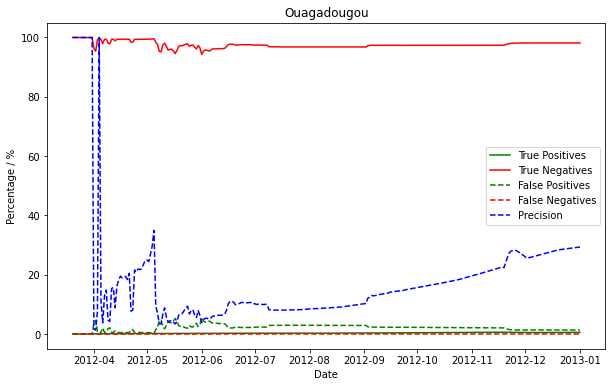

/var/folders/s9/s5q4rpnj00j_kr4yj0f8c_dm0000gp/T/ipykernel_51025/528131781.py:74: RuntimeWarning: invalid value encountered in true_divide
  acc_dic[camp]['Precision'] = np.where(denominator != 0, tps / denominator, 1)


91.66666666666667
Mean precision is 91.66666666666667


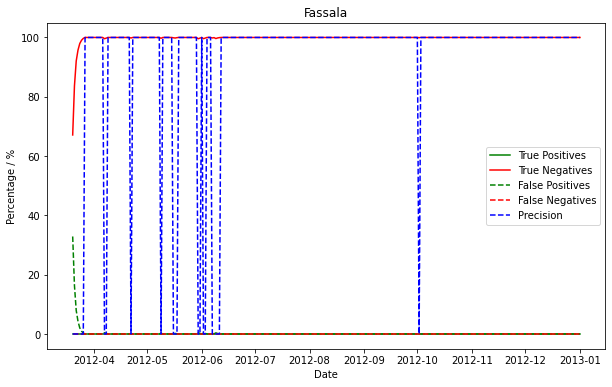

100.0
Mean precision is 100.0


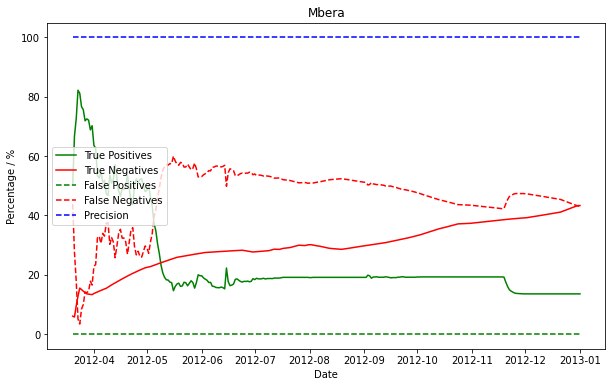

96.79451350134546
Mean precision is 96.79451350134546


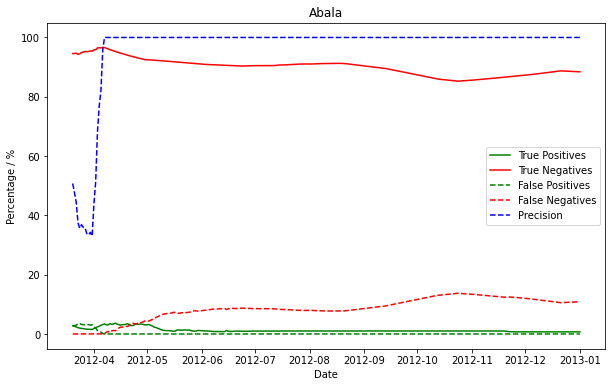

38.659849159004416
Mean precision is 38.659849159004416


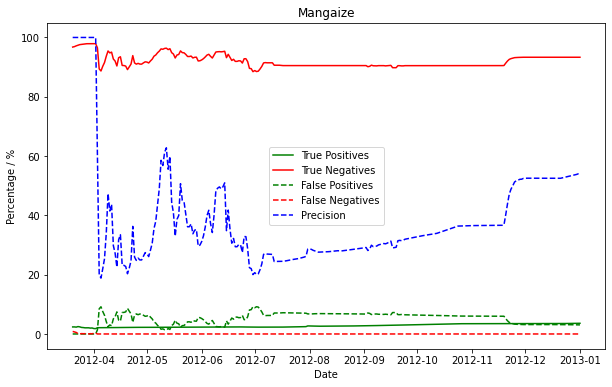

94.88226320227915
Mean precision is 94.88226320227915


/var/folders/s9/s5q4rpnj00j_kr4yj0f8c_dm0000gp/T/ipykernel_51025/528131781.py:74: RuntimeWarning: invalid value encountered in true_divide
  acc_dic[camp]['Precision'] = np.where(denominator != 0, tps / denominator, 1)


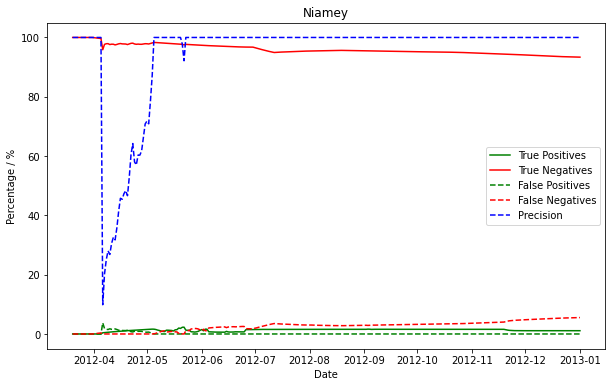

/var/folders/s9/s5q4rpnj00j_kr4yj0f8c_dm0000gp/T/ipykernel_51025/528131781.py:74: RuntimeWarning: invalid value encountered in true_divide
  acc_dic[camp]['Precision'] = np.where(denominator != 0, tps / denominator, 1)


56.536205851207676
Mean precision is 56.536205851207676


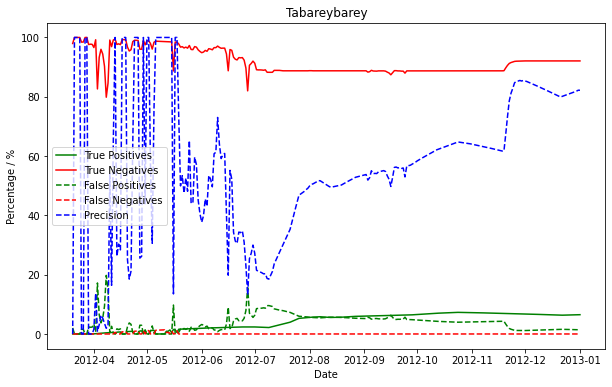

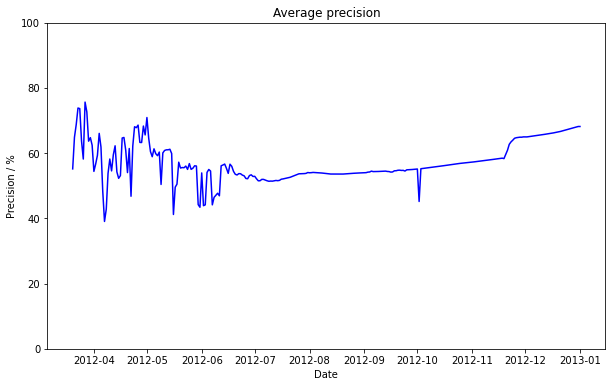

In [160]:
# CAMP DISTRIBUTION
emps = [
    bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][67:].values,
    goudoubo['Nombre estimé de réfugiés maliens par période'][67:].values,
    mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'][67:].values,
    ouagadougou['Nombre estimé de réfugiés maliens par période'][67:].values,
    fassala['Réfugiés maliens'][67:].values,
    mbera['Réfugiés maliens'][67:].values,
    abala['Nombre estimé de réfugiés maliens par période'][67:].values,
    mangaize['Nombre estimé de réfugiés maliens par période'][67:].values,
    niamey['Nombre estimé de réfugiés maliens par période'][67:].values,
    tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][67:].values
]

empsum = [sum(values) for values in zip(*emps)]
print(len(empsum))

empnorms = []
for inner_list in emps:
    normalized_list = [value / empsum[o] if empsum[o] != 0 else 0 for o, value in enumerate(inner_list)]
    empnorms.append(normalized_list)
print("empnorms:", empnorms)

sims = [
    bobo_sim[67:].values, goudoubo_sim[67:].values, mentao_sim[67:].values, ouagadougou_sim[67:].values,
    fassala_sim[67:].values, mbera_sim[67:].values, abala_sim[67:].values, mangaize_sim[67:].values, 
    niamey_sim[67:].values, tabareybarey_sim[67:].values
]

simsum = [sum(values) for values in zip(*sims)]
print(simsum)

simnorms = []
for inner_list in sims:
    normalized_list = [value / simsum[i] if simsum[i] != 0 else 0 for i, value in enumerate(inner_list)]
    simnorms.append(normalized_list)
print("simnorms:", simnorms)

# Initialize arrays separately for each location
acc_dic = {
    'Bobo': {'fns': np.zeros(len(empsum)), 'tns': np.zeros(len(empsum)), 'fps': np.zeros(len(empsum)), 'tps': np.zeros(len(empsum))},
    'Goudoubo': {'fns': np.zeros(len(empsum)), 'tns': np.zeros(len(empsum)), 'fps': np.zeros(len(empsum)), 'tps': np.zeros(len(empsum))},
    'Mentao': {'fns': np.zeros(len(empsum)), 'tns': np.zeros(len(empsum)), 'fps': np.zeros(len(empsum)), 'tps': np.zeros(len(empsum))},
    'Ouagadougou': {'fns': np.zeros(len(empsum)), 'tns': np.zeros(len(empsum)), 'fps': np.zeros(len(empsum)), 'tps': np.zeros(len(empsum))},
    'Fassala': {'fns': np.zeros(len(empsum)), 'tns': np.zeros(len(empsum)), 'fps': np.zeros(len(empsum)), 'tps': np.zeros(len(empsum))},
    'Mbera': {'fns': np.zeros(len(empsum)), 'tns': np.zeros(len(empsum)), 'fps': np.zeros(len(empsum)), 'tps': np.zeros(len(empsum))},
    'Abala': {'fns': np.zeros(len(empsum)), 'tns': np.zeros(len(empsum)), 'fps': np.zeros(len(empsum)), 'tps': np.zeros(len(empsum))},
    'Mangaize': {'fns': np.zeros(len(empsum)), 'tns': np.zeros(len(empsum)), 'fps': np.zeros(len(empsum)), 'tps': np.zeros(len(empsum))},
    'Niamey': {'fns': np.zeros(len(empsum)), 'tns': np.zeros(len(empsum)), 'fps': np.zeros(len(empsum)), 'tps': np.zeros(len(empsum))},
    'Tabareybarey': {'fns': np.zeros(len(empsum)), 'tns': np.zeros(len(empsum)), 'fps': np.zeros(len(empsum)), 'tps': np.zeros(len(empsum))}
}

labels = ['Bobo','Goudoubo','Mentao','Ouagadougou',
          'Fassala','Mbera','Abala','Mangaize',
          'Niamey', 'Tabareybarey']

for i in range(len(emps)):
    for j in range(len(empsum)):
        print(len(simnorms[i]))
        acc_dic[labels[i]]['tps'][j] = min(empnorms[i][j], simnorms[i][j])
        if empnorms[i][j] > simnorms[i][j]:
            acc_dic[labels[i]]['fns'][j] = empnorms[i][j] - simnorms[i][j]
            acc_dic[labels[i]]['tns'][j] = 1 - empnorms[i][j]
        else:
            acc_dic[labels[i]]['fps'][j] = simnorms[i][j] - empnorms[i][j]
            acc_dic[labels[i]]['tns'][j] = 1 - simnorms[i][j]


for camp in labels:
    # Create a new figure
    tps = np.array(acc_dic[camp]['tps'])
    fps = np.array(acc_dic[camp]['fps'])
    denominator = tps + fps
    acc_dic[camp]['Precision'] = np.where(denominator != 0, tps / denominator, 1)

    plt.figure(figsize=(10, 6))

    # Plotting the data
    print(np.mean(100*acc_dic[camp]['Precision']))
    plt.plot(date_sim[67:], 100*acc_dic[camp]['tps'], color='g', label='True Positives')
    plt.plot(date_sim[67:], 100*acc_dic[camp]['tns'], color='r', label='True Negatives')
    plt.plot(date_sim[67:], 100*acc_dic[camp]['fps'], color='g', linestyle='--', label='False Positives')
    plt.plot(date_sim[67:], 100*acc_dic[camp]['fns'], color='r', linestyle='--', label='False Negatives')
    plt.plot(date_sim[67:], 100*acc_dic[camp]['Precision'], color='b',linestyle='--',label='Precision')
    
    print("Mean precision is " + str(np.mean(100*acc_dic[camp]['Precision'])))
    
    # Adding titles and labels
    plt.title(camp)
    plt.xlabel('Date')
    plt.ylabel('Percentage / %')

    # Adding a legend
    plt.legend()

    # Show the plot
    plt.show()


precisionsum = [0] * len(next(iter(acc_dic.values()))['Precision'])

# Loop through the dictionary of dictionaries
for val, dic in acc_dic.items():
    i = 0
    for accval in dic['Precision']:
        precisionsum[i] += accval
        i += 1

prec= [100*x/len(emps) for x in precisionsum]

plt.figure(figsize=(10, 6))
plt.plot(date_sim[67:],prec, color='b')
plt.title('Average precision')
plt.xlabel('Date')
plt.ylabel('Precision / %')
plt.ylim(0,100)
plt.show()









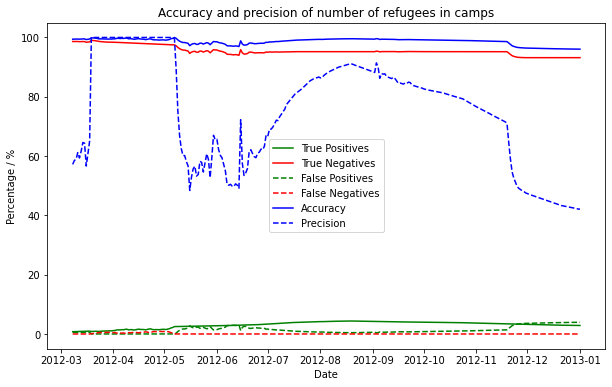

98.60615593071387
75.073592201731


In [153]:
# Number of refugees in camps

tps = np.zeros(len(empsum))
fps = np.zeros(len(empsum))
tns = np.zeros(len(empsum))
fns = np.zeros(len(empsum))
prec = np.zeros(len(empsum))
acc = np.zeros(len(empsum))
totsum=3321680*np.ones(len(empsum))


for i in range(len(empsum)):
    tps[i]=min(empsum[i],simsum[i])/totsum[i]
    if empsum[i] > simsum[i]:
        fns[i]=(empsum[i]-simsum[i])/totsum[i]
        tns[i]=(3321680-empsum[i])/totsum[i]
    else:
        fps[i]=(simsum[i]-empsum[i])/totsum[i]
        tns[i]=(3321680-simsum[i])/totsum[i]
    prec[i]=tps[i]/(tps[i]+fps[i])
    acc[i]=(tps[i]+tns[i])/(tps[i]+fps[i]+tns[i]+fns[i])



plt.figure(figsize=(10, 6))
plt.plot(date_sim[67:], 100*tps, color='g', label='True Positives')
plt.plot(date_sim[67:], 100*tns, color='r', label='True Negatives')
plt.plot(date_sim[67:], 100*fps, color='g', linestyle='--', label='False Positives')
plt.plot(date_sim[67:], 100*fns, color='r', linestyle='--', label='False Negatives')
plt.plot(date_sim[67:], 100*acc, color='b',label='Accuracy')
plt.plot(date_sim[67:], 100*prec, color='b',linestyle='--',label='Precision')
plt.title('Accuracy and precision of number of refugees in camps')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Percentage / %')
plt.show()

print(np.mean(100*acc))
print(np.mean(100*prec))




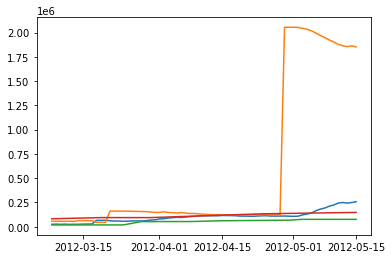

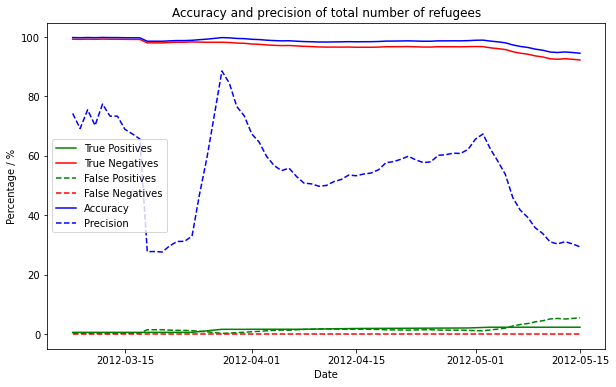

98.43941877324866
54.81147410758741


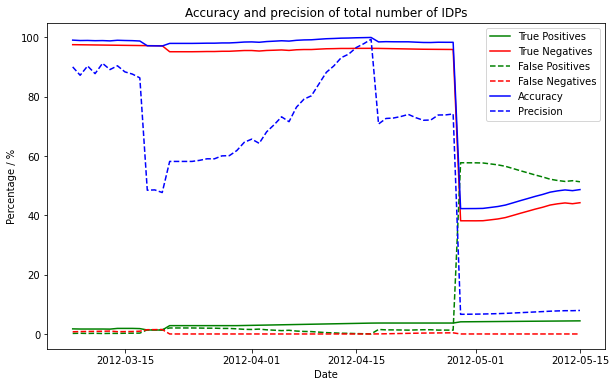

85.4710658647019
58.09504755172516


In [154]:
# Number of Refugees

def prepare_data(df, date_col, value_col, date_range):
    df[date_col] = pd.to_datetime(df[date_col], format='%Y-%m-%d')
    df.set_index(date_col, inplace=True)

    # Interpolating missing dates
    df = df.reindex(date_range).interpolate(method='time')

    # Extrapolating the first and last values if necessary
    df = df.fillna(method='ffill').fillna(method='bfill')

    return df

def prepare_data2(df, date_col, value_col, date_range):
    df[date_col] = pd.to_datetime(df[date_col], format='%d-%m-%Y')
    df.set_index(date_col, inplace=True)

    # Interpolating missing dates
    df = df.reindex(date_range).interpolate(method='time')

    # Extrapolating the first and last values if necessary
    df = df.fillna(method='ffill').fillna(method='bfill')

    return df

df = pd.read_csv('pop_data/source-data-unhcr-pdf-reports.csv')

tps = np.zeros(len(ref))
fps = np.zeros(len(ref))
tns = np.zeros(len(ref))
fns = np.zeros(len(ref))
prec = np.zeros(len(ref))
acc = np.zeros(len(ref))


date_range = pd.date_range(start='2012-03-08', end='2012-05-15')
ref_df = pd.read_csv('pop_data/refugees.csv')
date_col='DateTime'
value_col='Réfugiés maliens'
date_col2='date'
value_col2='Internally Displaced'

ref_df = prepare_data(ref_df, date_col, value_col, date_range)
idp = prepare_data2(df, date_col2, value_col2, date_range)

ref_sim2=ref_sim[68:137]
idp_sim2=idp_sim[68:137]

plt.figure()
plt.plot(date_range,ref_sim2)
plt.plot(date_range,idp_sim2)
plt.plot(date_range,ref_df[value_col])
plt.plot(date_range,idp[value_col2])

totsum=3321680*np.ones(len(ref_sim2))
tps = np.zeros(len(ref_sim2))
fps = np.zeros(len(ref_sim2))
tns = np.zeros(len(ref_sim2))
fns = np.zeros(len(ref_sim2))
prec = np.zeros(len(ref_sim2))
acc = np.zeros(len(ref_sim2))

refsim=[x for x in ref_sim2]
refemp=[x for x in ref_df[value_col]]


# Refugees
for i in range(len(ref_sim2)):
    tps[i] = min(refemp[i], refsim[i]) / totsum[i]
    if refemp[i] > refsim[i]:
        fns[i] = (refemp[i] - refsim[i]) / totsum[i]
        tns[i] = (3321680 - refemp[i]) / totsum[i]
    else:
        fps[i] = (refsim[i] - refemp[i]) / totsum[i]
        tns[i] = (3321680 - refsim[i]) / totsum[i]
    prec[i] = tps[i] / (tps[i] + fps[i]) if (tps[i] + fps[i]) != 0 else 1
    acc[i] = (tps[i] + tns[i]) / (tps[i] + fps[i] + tns[i] + fns[i]) if (tps[i] + fps[i] + tns[i] + fns[i]) != 0 else 1


plt.figure(figsize=(10, 6))
plt.plot(date_range, 100*tps, color='g', label='True Positives')
plt.plot(date_range, 100*tns, color='r', label='True Negatives')
plt.plot(date_range, 100*fps, color='g', linestyle='--', label='False Positives')
plt.plot(date_range, 100*fns, color='r', linestyle='--', label='False Negatives')
plt.plot(date_range, 100*acc, color='b',label='Accuracy')
plt.plot(date_range, 100*prec, color='b',linestyle='--',label='Precision')
plt.title('Accuracy and precision of total number of refugees')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Percentage / %')
plt.show()

print(np.mean(100*acc))
print(np.mean(100*prec))

# IDPs

idpsim=[x for x in idp_sim2]
idpemp=[x for x in idp[value_col2]]

for i in range(len(idp_sim2)):
    tps[i] = min(idpemp[i], idpsim[i]) / totsum[i]
    if idpemp[i] > idpsim[i]:
        fns[i] = (idpemp[i] - idpsim[i]) / totsum[i]
        tns[i] = (3321680 - idpemp[i]) / totsum[i]
    else:
        fps[i] = (idpsim[i] - idpemp[i]) / totsum[i]
        tns[i] = (3321680 - idpsim[i]) / totsum[i]
    prec[i] = tps[i] / (tps[i] + fps[i]) if (tps[i] + fps[i]) != 0 else 1
    acc[i] = (tps[i] + tns[i]) / (tps[i] + fps[i] + tns[i] + fns[i]) if (tps[i] + fps[i] + tns[i] + fns[i]) != 0 else 1


plt.figure(figsize=(10, 6))
plt.plot(date_range, 100*tps, color='g', label='True Positives')
plt.plot(date_range, 100*tns, color='r', label='True Negatives')
plt.plot(date_range, 100*fps, color='g', linestyle='--', label='False Positives')
plt.plot(date_range, 100*fns, color='r', linestyle='--', label='False Negatives')
plt.plot(date_range, 100*acc, color='b',label='Accuracy')
plt.plot(date_range, 100*prec, color='b',linestyle='--',label='Precision')
plt.title('Accuracy and precision of total number of IDPs')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Percentage / %')
plt.show()

print(np.mean(100*acc))
print(np.mean(100*prec))


[]
[0.9805471124620061, 0.8896247240618101, 0.8382735309412377, 0.7585227272727273, 0.7132616487455197, 0.6535303776683087, 0.6393574297188755, 0.6551440329218107, 0.6393574297188755, 0.6184926184926185]


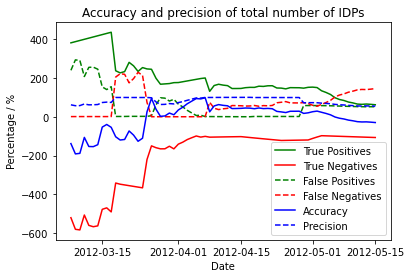

In [155]:
totrefemp=np.array(refemp)
refincampemp=np.array(idp['Total'])
refnorm_emp= refincampemp/totrefemp

totrefsim=np.array(refsim)
refincampsim=np.array(simsum[68:137])
refnorm_sim= refincampsim/totrefsim

print([x for x in refnorm_emp if x<1])
print([x for x in refnorm_sim if x<1])

for i in range(len(totrefsim)):
    tps[i] = min(refnorm_emp[i], refnorm_sim[i])
    if refnorm_emp[i] > refnorm_sim[i]:
        fns[i] = (refnorm_emp[i] - refnorm_sim[i])
        tns[i] = (1 - refnorm_emp[i])
    else:
        fps[i] = (refnorm_sim[i] - refnorm_emp[i])
        tns[i] = (1 - refnorm_sim[i])
    prec[i] = tps[i] / (tps[i] + fps[i]) if (tps[i] + fps[i]) != 0 else 1
    acc[i] = (tps[i] + tns[i]) / (tps[i] + fps[i] + tns[i] + fns[i]) if (tps[i] + fps[i] + tns[i] + fns[i]) != 0 else 1


plt.figure()
plt.plot(date_range, 100*tps, color='g', label='True Positives')
plt.plot(date_range, 100*tns, color='r', label='True Negatives')
plt.plot(date_range, 100*fps, color='g', linestyle='--', label='False Positives')
plt.plot(date_range, 100*fns, color='r', linestyle='--', label='False Negatives')
plt.plot(date_range, 100*acc, color='b',label='Accuracy')
plt.plot(date_range, 100*prec, color='b',linestyle='--',label='Precision')
plt.title('Accuracy and precision of total number of IDPs')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Percentage / %')
plt.show()


